### EDA: Анализ фаĸторов, влияющих на стоимость жилья

##### Этап 1: Загрузĸа и предварительное изучение данных

In [3]:
# Импорт необходимых библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [4]:
# Загрузка данных
df = pd.read_csv('./data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# 1. Информация о датасете
print(df.info())
print(f"Общее количество записей: {len(df)}")
print()

# 2. Проверка пропусков
missing_values = df.isnull().sum()
print(f"Пропущенные значения:\n{missing_values}")
print()

# 3. Проверка дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
Общее количество записей: 545

Пропущенные значения:
price               0
area                0
bedrooms            0
bathrooms           0
stories 

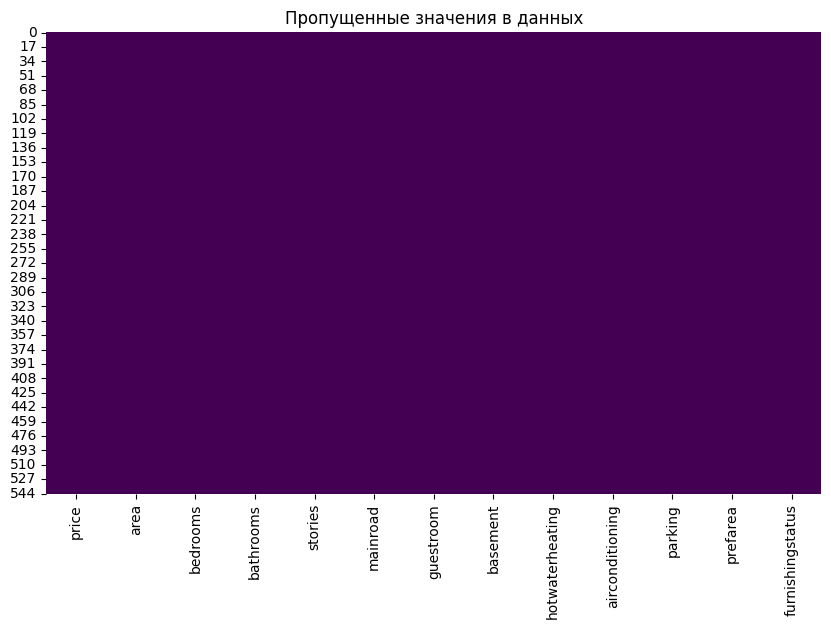

In [6]:
# 5. Визуализация пропусков
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Пропущенные значения в данных")
plt.show()

##### Этап 2: Изучение статистичесĸих хараĸтеристиĸ

In [7]:
# Извлечение колонок с числовыми переменными
numeric_columns = df.select_dtypes(include=['int64']).columns

# Среднее, минимальные, максимальные значения
stats = df[numeric_columns].describe().T
print(f"Основная статистика: \n\n{stats}")

Основная статистика: 

           count          mean           std        min        25%        50%  \
price      545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0  4340000.0   
area       545.0  5.150541e+03  2.170141e+03     1650.0     3600.0     4600.0   
bedrooms   545.0  2.965138e+00  7.380639e-01        1.0        2.0        3.0   
bathrooms  545.0  1.286239e+00  5.024696e-01        1.0        1.0        1.0   
stories    545.0  1.805505e+00  8.674925e-01        1.0        1.0        2.0   
parking    545.0  6.935780e-01  8.615858e-01        0.0        0.0        0.0   

                 75%         max  
price      5740000.0  13300000.0  
area          6360.0     16200.0  
bedrooms         3.0         6.0  
bathrooms        2.0         4.0  
stories          2.0         4.0  
parking          1.0         3.0  


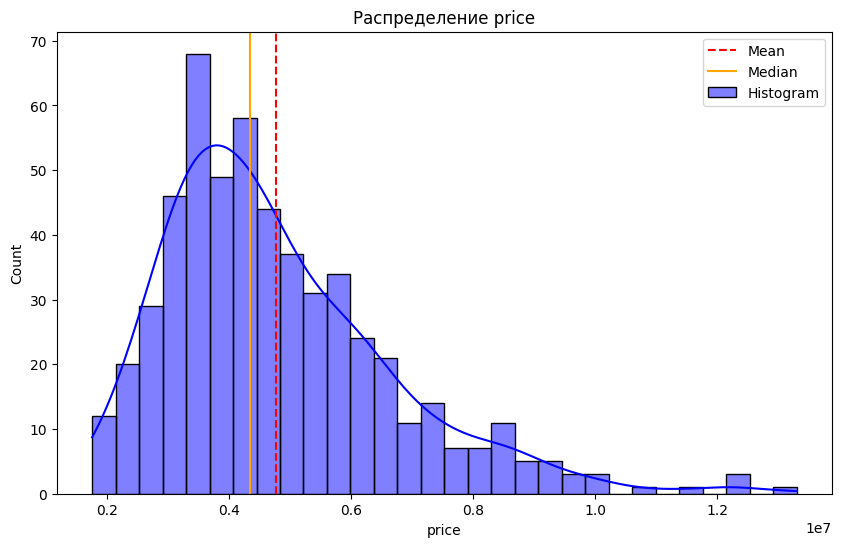

price: Основные статистики
--------------------------------------------------
Минимальное значение: 1750000
Максимальное значение: 13300000

Медиана: 4340000.0
Среднее: 4766729.25
Стандартное отклонение: 1870439.62

Асимметрия: 1.21
Эксцесс: 1.96



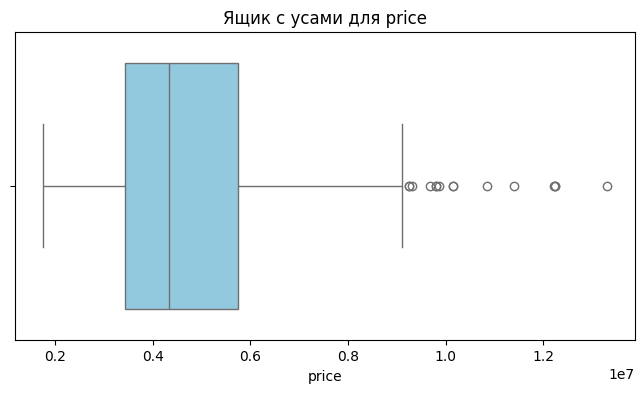

price: Выбросы
--------------------------------------------------
IQR: 2310000.00
Границы выбросов: [-35000.00, 9205000.00]
Количество выбросов: 15





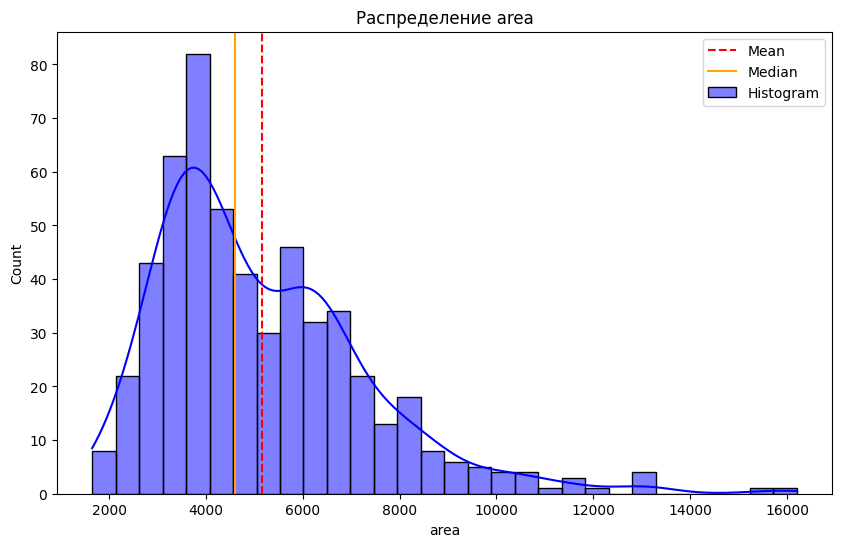

area: Основные статистики
--------------------------------------------------
Минимальное значение: 1650
Максимальное значение: 16200

Медиана: 4600.0
Среднее: 5150.54
Стандартное отклонение: 2170.14

Асимметрия: 1.32
Эксцесс: 2.75



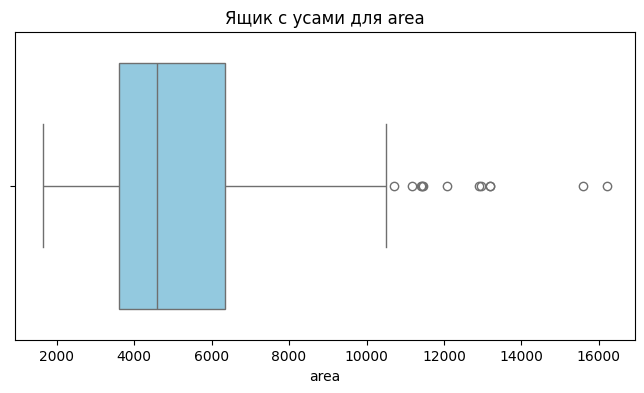

area: Выбросы
--------------------------------------------------
IQR: 2760.00
Границы выбросов: [-540.00, 10500.00]
Количество выбросов: 12





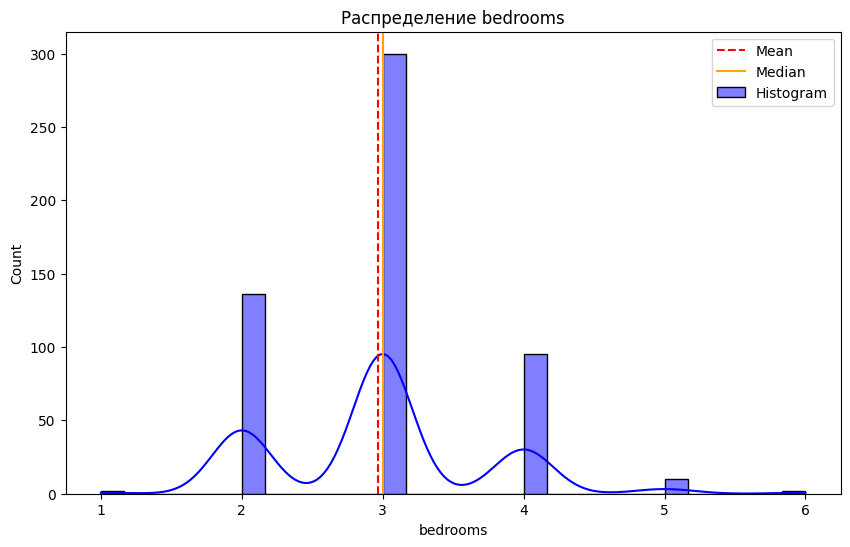

bedrooms: Основные статистики
--------------------------------------------------
Минимальное значение: 1
Максимальное значение: 6

Медиана: 3.0
Среднее: 2.97
Стандартное отклонение: 0.74

Асимметрия: 0.50
Эксцесс: 0.73



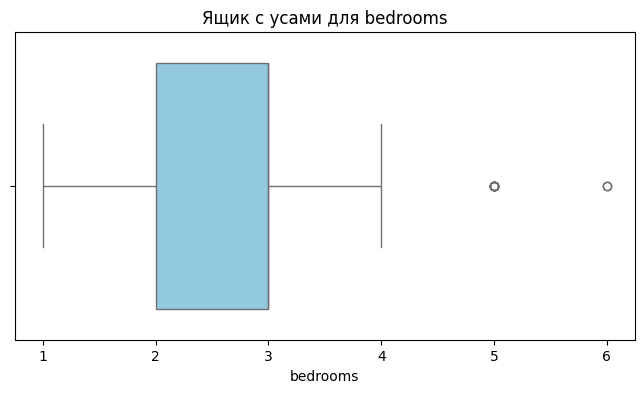

bedrooms: Выбросы
--------------------------------------------------
IQR: 1.00
Границы выбросов: [0.50, 4.50]
Количество выбросов: 12





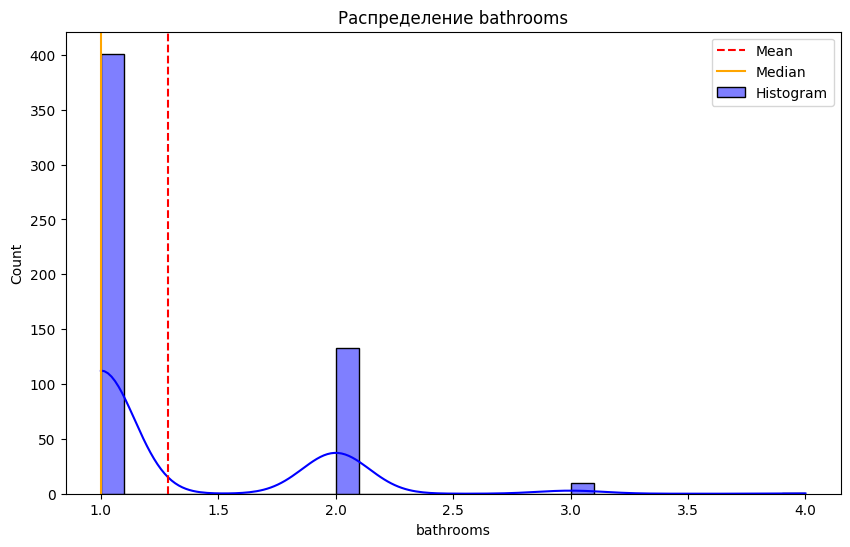

bathrooms: Основные статистики
--------------------------------------------------
Минимальное значение: 1
Максимальное значение: 4

Медиана: 1.0
Среднее: 1.29
Стандартное отклонение: 0.50

Асимметрия: 1.59
Эксцесс: 2.16



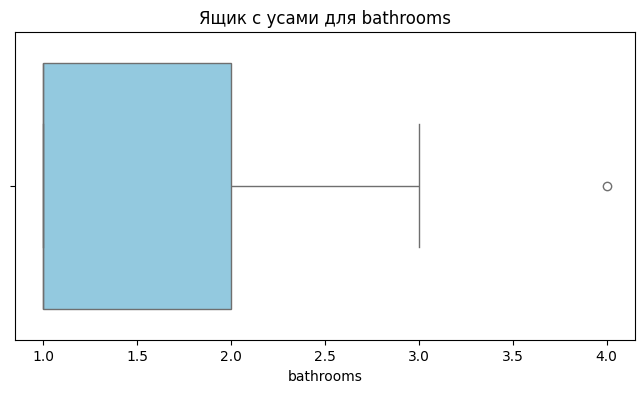

bathrooms: Выбросы
--------------------------------------------------
IQR: 1.00
Границы выбросов: [-0.50, 3.50]
Количество выбросов: 1





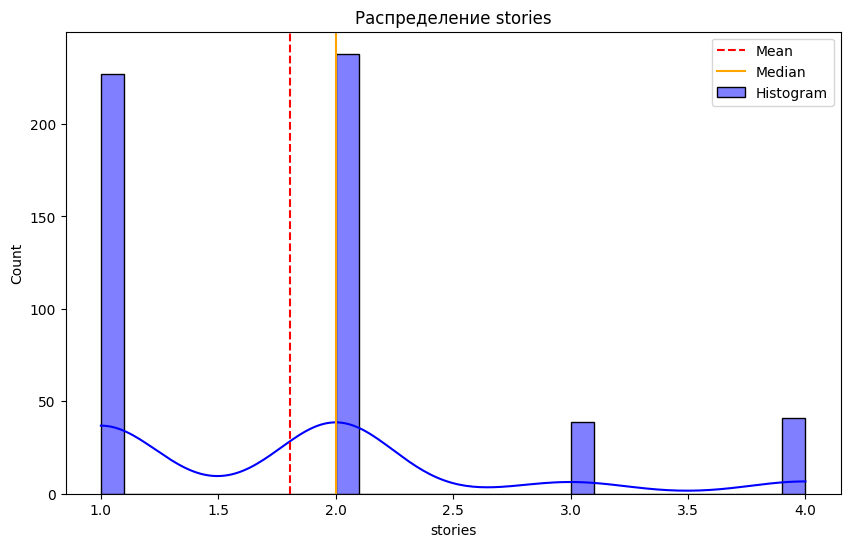

stories: Основные статистики
--------------------------------------------------
Минимальное значение: 1
Максимальное значение: 4

Медиана: 2.0
Среднее: 1.81
Стандартное отклонение: 0.87

Асимметрия: 1.08
Эксцесс: 0.68



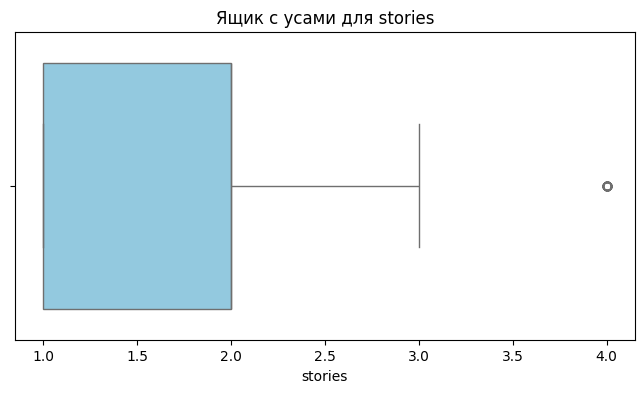

stories: Выбросы
--------------------------------------------------
IQR: 1.00
Границы выбросов: [-0.50, 3.50]
Количество выбросов: 41





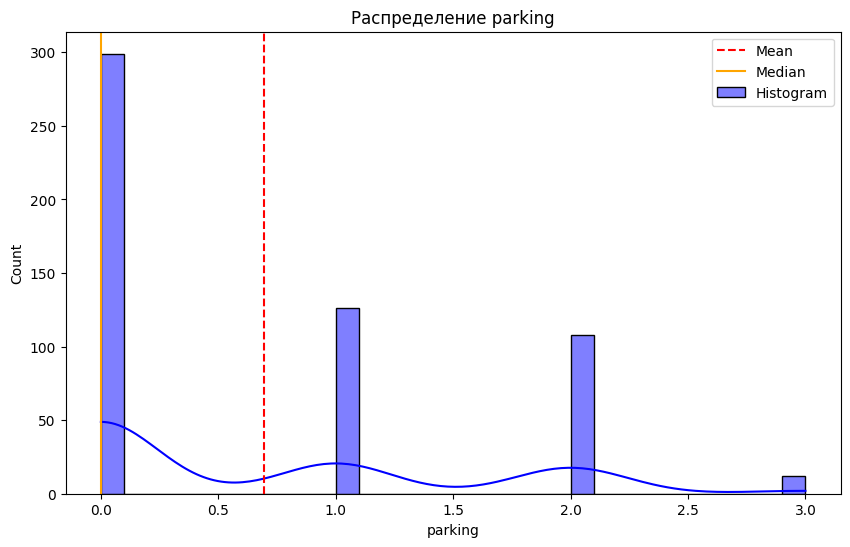

parking: Основные статистики
--------------------------------------------------
Минимальное значение: 0
Максимальное значение: 3

Медиана: 0.0
Среднее: 0.69
Стандартное отклонение: 0.86

Асимметрия: 0.84
Эксцесс: -0.57



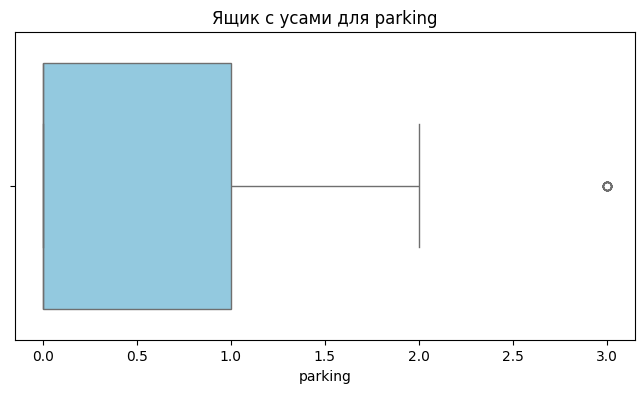

parking: Выбросы
--------------------------------------------------
IQR: 1.00
Границы выбросов: [-1.50, 2.50]
Количество выбросов: 12





In [8]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Гистограмма
    sns.histplot(df[col], kde=True, color='blue', bins=30, label='Histogram')

    # Вертикальные линии для среднего и медианы
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='orange', linestyle='-', label='Median')

    plt.title(f"Распределение {col}")
    plt.legend()
    plt.show()
    
    # Вычисление IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Определение выбросов
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    # Вывод статистики
    print(f"\033[1m{col}: Основные статистики\033[0m")
    print("-" * 50)
    print(f"Минимальное значение: {df[col].min()}")
    print(f"Максимальное значение: {df[col].max()}\n")
    print(f"Медиана: {df[col].median()}")
    print(f"Среднее: {df[col].mean():.2f}")
    print(f"Стандартное отклонение: {df[col].std():.2f}\n")
    print(f"Асимметрия: {df[col].skew():.2f}")
    print(f"Эксцесс: {df[col].kurt():.2f}")
    
    print("")

    # Визуализация выбросов на графике "ящика с усами"
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Ящик с усами для {col}")
    plt.show()
    
    print(f"\033[1m{col}: Выбросы\033[0m")
    print("-" * 50)
    print(f"IQR: {IQR:.2f}")
    print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Количество выбросов: {num_outliers}")
    print("=" * 50 + "\n\n\n")

Этап 3: Изучение взаимосвязей между переменными

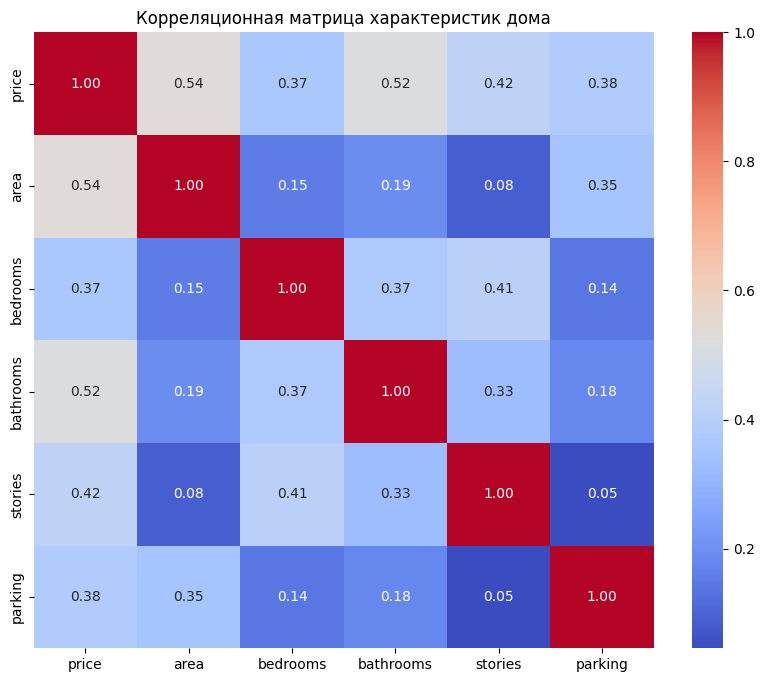

Переменные с наибольшей корреляцией со стоимостью жилья:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


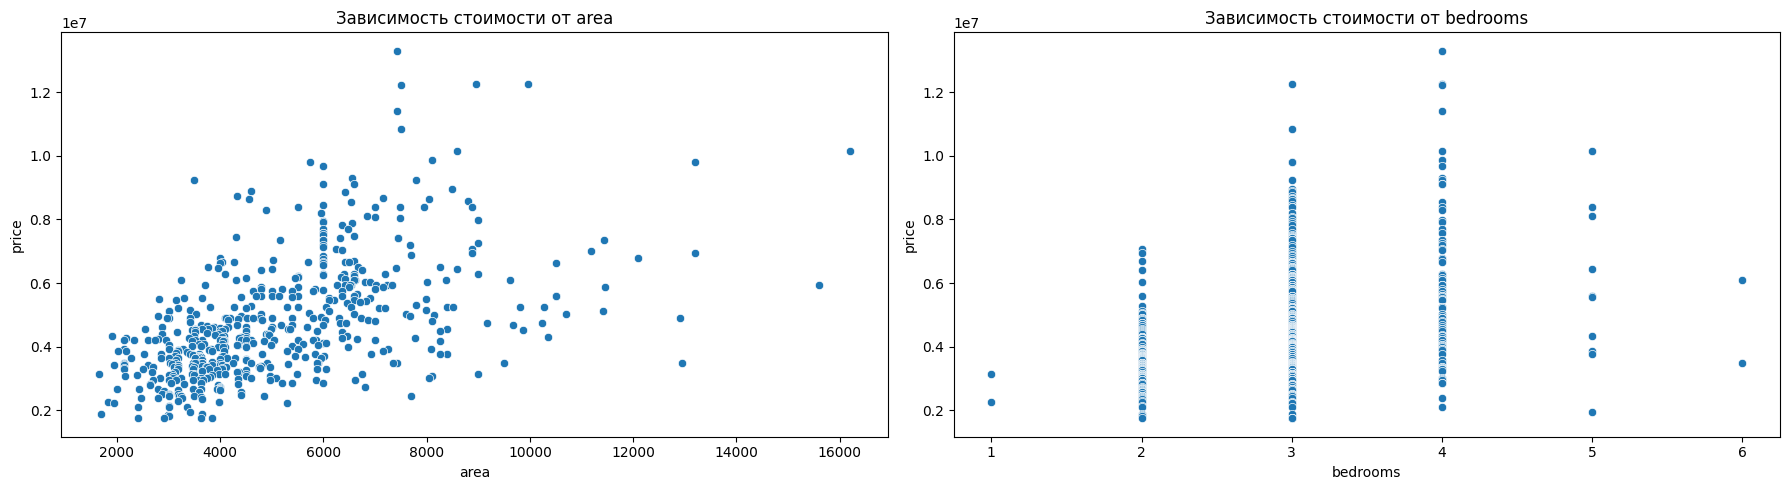

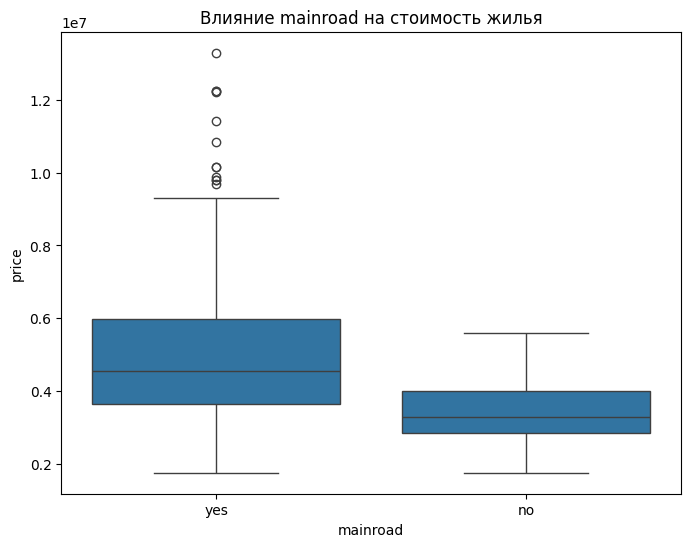

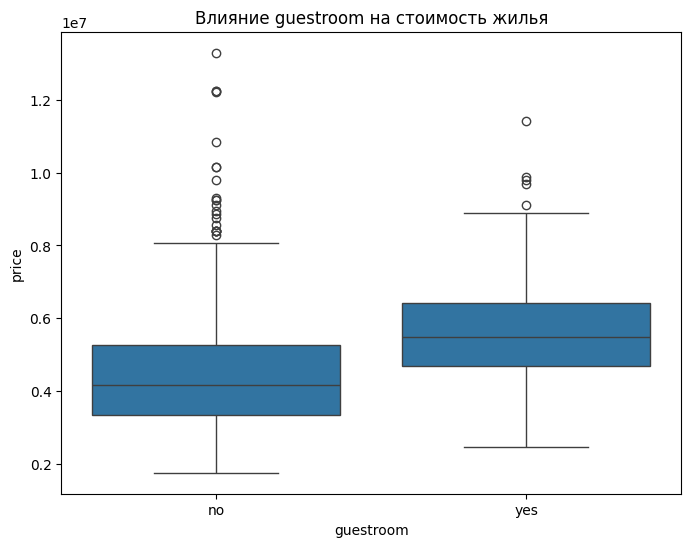

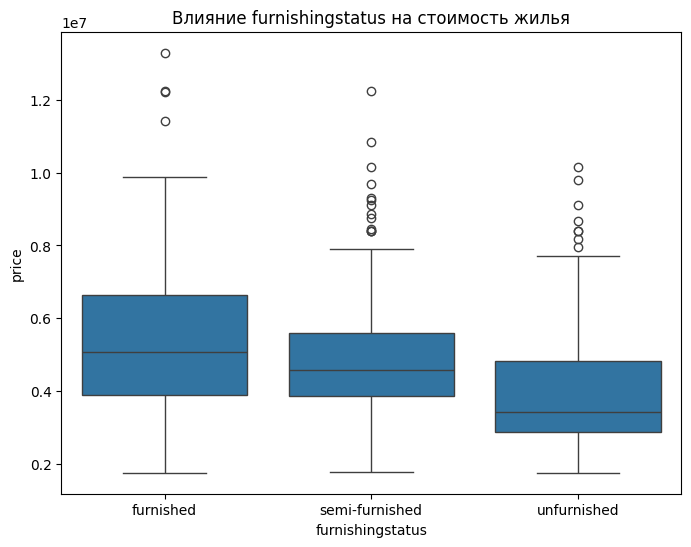

Для категориальных переменных значимость можно оценить по различиям медианы в boxplot.


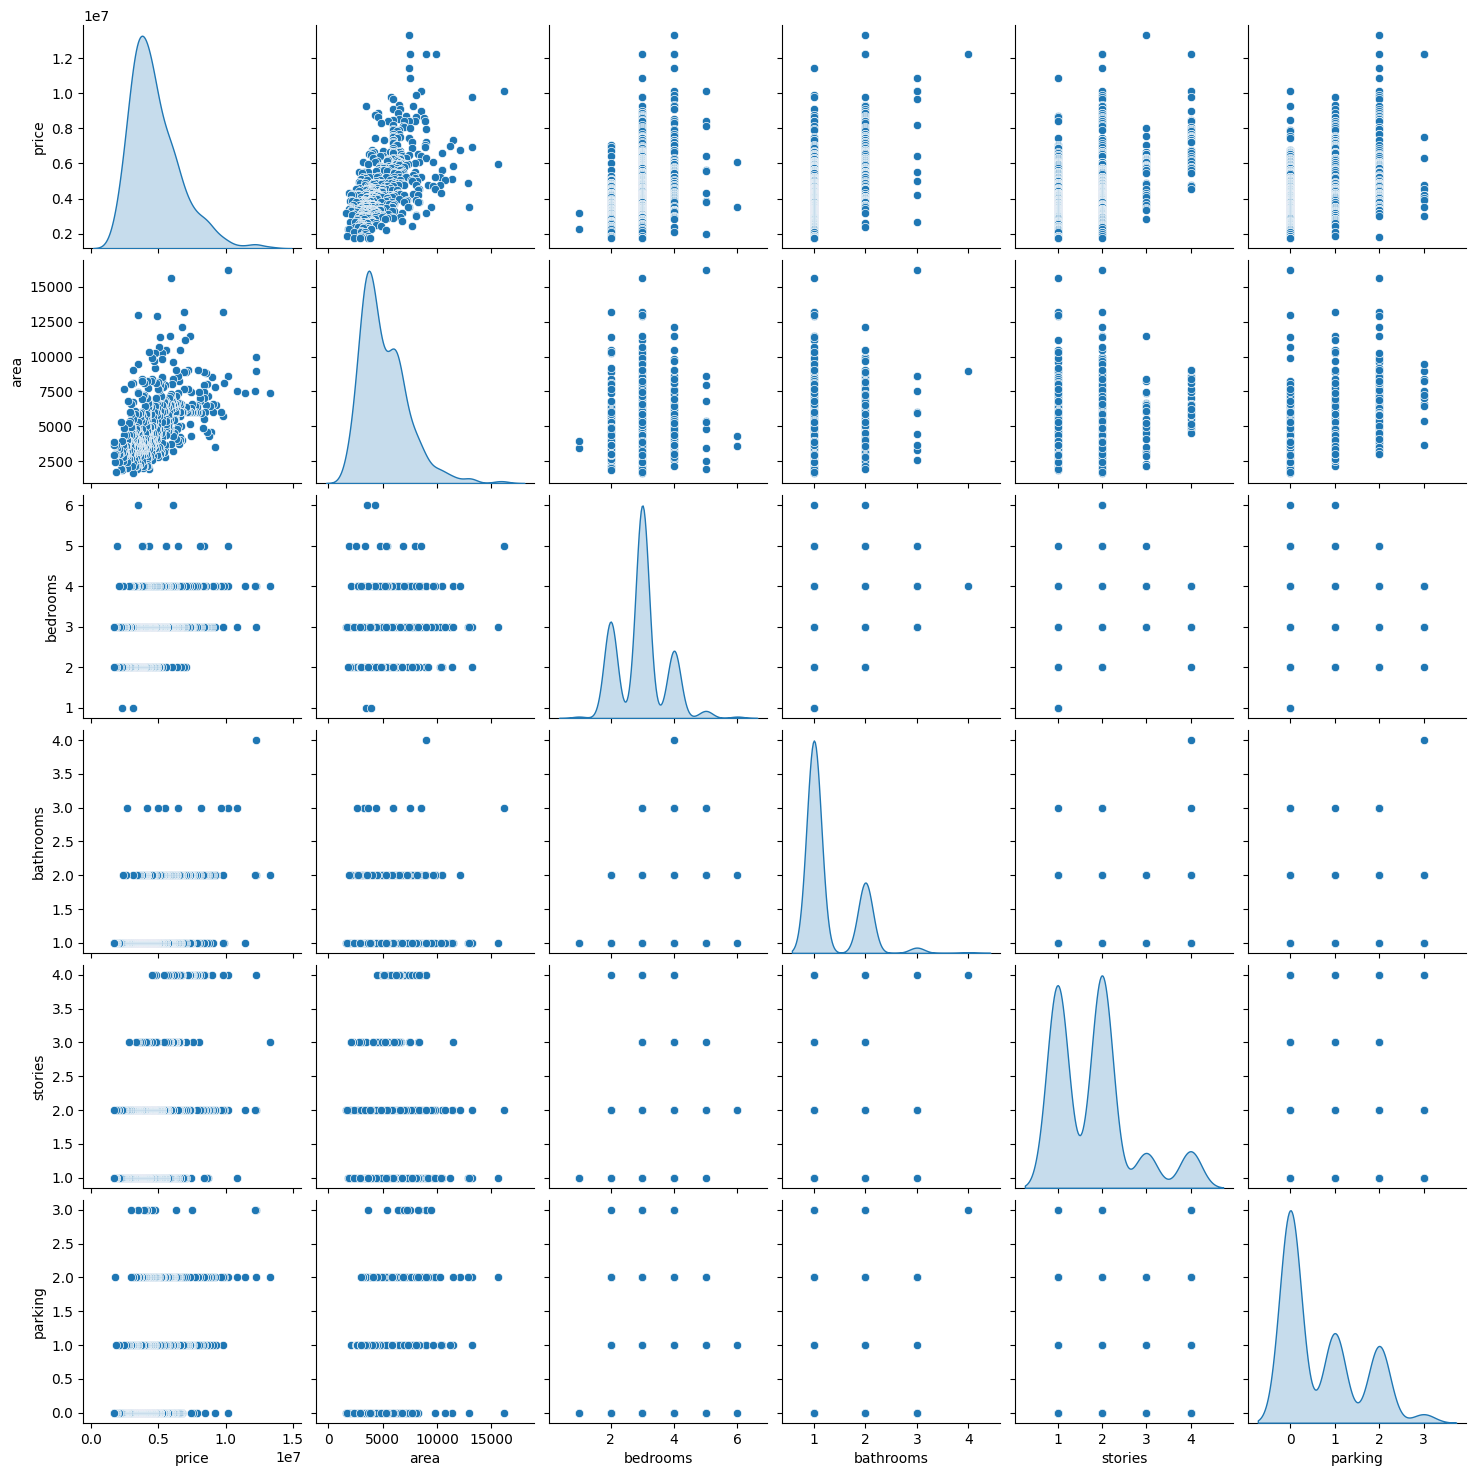

In [9]:
# 1. Построение корреляционной матрицы и визуализация тепловой карты
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица характеристик дома')
plt.show()

# Вывод переменных с наибольшей корреляцией со стоимостью жилья
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("Переменные с наибольшей корреляцией со стоимостью жилья:")
print(correlation_with_price)

# 2. Анализ зависимости между стоимостью жилья и характеристиками (scatter-плоты)
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
characteristics = ['area', 'bedrooms']  # Укажите названия колонок для анализа

for i, char in enumerate(characteristics):
    sns.scatterplot(data=df, x=char, y='price', ax=axes[i])
    axes[i].set_title(f'Зависимость стоимости от {char}')
    axes[i].set_xlabel(char)
    axes[i].set_ylabel('price')

plt.tight_layout()
plt.show()

# 3. Анализ влияния категориальных переменных на стоимость жилья (boxplot)
categorical_features = ['mainroad', 'guestroom', 'furnishingstatus']  # Замените на ваши категории
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'Влияние {feature} на стоимость жилья')
    plt.show()

# Вывод значимости категориальных признаков
print("Для категориальных переменных значимость можно оценить по различиям медианы в boxplot.")

# 4. Построение парных графиков
sns.pairplot(df, diag_kind='kde')
plt.show()

Из графиков видно, что стоимость жилья сильно зависит от площади дома — чем больше площадь, тем выше цена. Количество ванных комнат также заметно влияет на стоимость, в то время как количество комнат оказывает меньшее воздействие. Распределение цен асимметрично, что указывает на наличие дорогих объектов. Для категориальных признаков, таких как наличие мебели или доступ к главной дороге, разница в стоимости между категориями заметна, что говорит об их значимости. Выбросы в данных, особенно для площади, могут искажать анализ, поэтому их нужно учитывать.

Этап 4: Автоматизация анализа

In [ ]:
# Создание и сохранение профиля
profile = ProfileReport(df, title="Отчёт о данных: Housing Dataset", explorative=True)
profile.to_file("housing_report.html")

# Чтобы просмотреть отчёт прямо в Jupyter Notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Сравнив мои выводы с результатами автоматического отчёта, можно сказать, что особых различий между ними обнаружено не было. Оба подхода приходят к схожим заключениям, что свидетельствует о правильности и достоверности анализа.

Однако автоматический отчёт оказался более структурированным и удобным для восприятия. Он представил информацию в наглядной форме, что позволило легко выделить основные аспекты и моменты, требующие внимания. Такой формат отчёта делает информацию более доступной и помогает быстрее ориентироваться в результатах анализа.